In [3]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading the dataset
df=pd.read_csv('newdataset1.csv')

In [5]:
df.head(6)

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Positions
0,32,94,94,95500000,565000,2228,89,63,89,63,...,53,82,62,91,89,92,91,66,92,ST
1,30,93,93,105000000,565000,2154,92,48,90,95,...,45,84,59,92,90,88,91,62,88,RW
2,25,92,94,123000000,280000,2100,94,56,96,82,...,46,79,59,88,87,84,89,64,84,LW
3,30,92,92,97000000,510000,2291,88,78,86,60,...,58,80,65,88,85,88,87,68,88,ST
4,28,91,91,92000000,355000,2143,79,80,78,80,...,57,78,62,87,82,88,84,61,88,ST
5,26,90,91,90500000,295000,2096,93,54,93,91,...,47,81,61,87,87,82,88,64,82,LW


In [6]:
#Choosing the appropriate attributes to use
xnames = np.asarray(df.columns.tolist())[:35]
xnames = np.delete(xnames,[1,2,3,4])

In [7]:
xnames.shape

(31,)

In [8]:
y=df['Overall'].as_matrix()
dummy = df[xnames].as_matrix()
position = df['Preferred Positions'].as_matrix()
position_unique,position = np.unique(position, return_inverse=True)

In [9]:
x = np.ndarray((len(y),32))
x[:,:31]=dummy
x[:,31] = position

In [10]:
#preprocessing
from sklearn import linear_model, preprocessing
x = preprocessing.scale(x)
y = preprocessing.scale(y)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
X=x
Y=y

In [12]:
import  sklearn.model_selection
from sklearn import linear_model

In [13]:
X.shape

(15143, 32)

In [14]:
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Create the LASSO model.  We use the `warm start` parameter so that the fit will start at the previous value.
# This speeds up the fitting.
model = linear_model.Lasso(warm_start=True)

# Regularization values to test
nalpha = 100
alphas = np.logspace(-2,1,nalpha)

# MSE for each alpha and fold value
mse = np.zeros((nalpha,nfold))
for ifold, ind in enumerate(kf.split(X)):
    
    
    # Get the training data in the split
    Itr,Its = ind
    X_tr = X[Itr,:]
    y_tr = Y[Itr]
    X_ts = X[Its,:]
    y_ts = Y[Its]
    
    # Compute the lasso path for the split
    for ia, a in enumerate(alphas):
        
        # Fit the model on the training data
        model.alpha = a
        model.fit(X_tr,y_tr)
        
        # Compute the prediction error on the test data
        y_ts_pred = model.predict(X_ts)
        mse[ia,ifold] = np.mean((y_ts_pred-y_ts)**2)

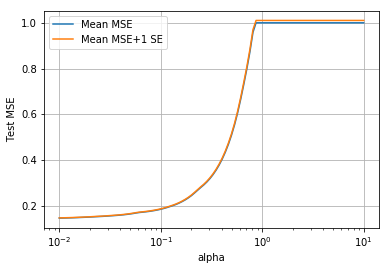

In [15]:
mse_mean = np.mean(mse,axis=1)
mse_std = np.std(mse,axis=1) / np.sqrt(nfold-1)

# Plot the mean MSE and the mean MSE + 1 std dev
plt.semilogx(alphas, mse_mean)
plt.semilogx(alphas, mse_mean+mse_std)
plt.legend(['Mean MSE', 'Mean MSE+1 SE'],loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test MSE')
plt.grid()
plt.show()

Optimal alpha = 0.012328


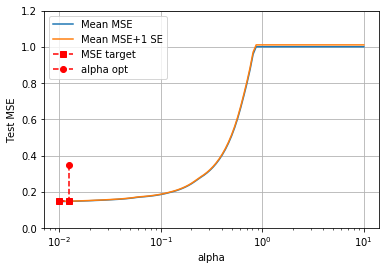

In [16]:
# Find the minimum MSE and MSE target
imin = np.argmin(mse_mean)
mse_tgt = mse_mean[imin] + mse_std[imin]
alpha_min = alphas[imin]

# Find the least complex model with mse_mean < mse_tgt
I = np.where(mse_mean < mse_tgt)[0]
iopt = I[-1]
alpha_opt = alphas[iopt]
print("Optimal alpha = %f" % alpha_opt)

# Plot the mean MSE and the mean MSE + 1 std dev
plt.semilogx(alphas, mse_mean)
plt.semilogx(alphas, mse_mean+mse_std)

# Plot the MSE target
plt.semilogx([alpha_min,alpha_opt], [mse_tgt,mse_tgt], 'rs--')

# Plot the optimal alpha line
plt.semilogx([alpha_opt,alpha_opt], [0.35,mse_mean[iopt]], 'ro--')

plt.legend(['Mean MSE', 'Mean MSE+1 SE', 'MSE target','alpha opt'],loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test MSE')
plt.ylim([0,1.2])
plt.grid()
plt.show()

In [17]:
#Finding optimal alpha
np.append(xnames,'Preferred Positions')
model.alpha = alpha_opt
#print(alpha_opt)
model.fit(X,Y)

new = []

# print all the attributes that are significant.
for i in range(len(model.coef_)-1):
    if model.coef_[i]>0:
        print("%s\t %f" % (xnames[i], model.coef_[i]))
        new.append(xnames[i])

Age	 0.025758
Special	 0.054120
Acceleration	 0.044800
Ball control	 0.232896
Composure	 0.193608
Crossing	 0.001786
Heading accuracy	 0.167199
Interceptions	 0.007128
Reactions	 0.335980
Short passing	 0.095607
Sprint speed	 0.062715
Stamina	 0.002869
Standing tackle	 0.050580
Strength	 0.085318


In [19]:
new = np.asarray(new)

In [20]:
X_new = df[new].as_matrix()
#Y_new = df['Wage'].as_matrix()
Y_new = df['Overall'].as_matrix()
X_new = preprocessing.scale(X_new)
Y_new = preprocessing.scale(Y_new)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
X_new.shape

(15143, 14)

In [22]:
#Fitting the model using optimal alpha
model_new = linear_model.Lasso(warm_start=True)
model_new.alpha = alpha_opt
model_new.fit(X_new,Y_new)

Lasso(alpha=0.012328467394420659, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=True)

In [23]:
print(model_new.alpha)

0.0123284673944


In [24]:
#Calculating the accuracy
y_pred=model_new.predict(X_new)
RSS=np.mean((y_pred-Y_new)**2)/(np.std(Y_new)**2)
Rsq=1-RSS
print("Rss per sample={0:f}".format(RSS))
print("R^2=           {0:f}".format(Rsq))

Rss per sample=0.149131
R^2=           0.850869
